# PHAS0029 Session 8
# Finding roots, and boundary value problems

_Author: louise.dash@ucl.ac.uk    
Updated: 03/03/2021_

This notebook will first introduce you to ways of finding roots of a function, and then use this to extend our differential equation techniques to calculate for boundary value problems as well as initial value problems. You'll use these techniques in the task for session 8, which forms the first part of the PHAS0029 final assignment.

In [1]:
# interactive plots
%matplotlib notebook

# importing modules
import numpy as np
import matplotlib.pyplot as plt


from IPython.display import Image # needed to import a remote image in the next cell


## Finding roots: Newton-Raphson and the secant method

We want to find the root of a function - the point at which the value of the function is zero. There are many ways of doing this, and we're going to look at two of them here: the Newton-Raphson method, and an extension of this, the *secant method*.

Imagine that we have a function $f(x)$ that we want to find the roots of. We'll make a guess as to where we think a root may be, and pick a point $x$ nearby. If we know the derivative of $f(x)$, that would enable us to draw a tangent at $x$, and calculate where the tangent crosses the $x$ axis. i.e. we can calculate
$$
x' = x - \Delta x = x - \frac{f(x)}{f'(x)}.
$$
We could then calculate the function at this point $x'$, recalculate the tangent, and repeat this process until we converge on the actual root. Like this:  [animated gif from Wikimedia commons](http://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)


In [2]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif')

This method is known as the *Newton-Raphson method*, and is widely used. 

But what if we don't know the derivative $f'(x)$? 

Instead, we can start with two points, $x_1$ and $x_2$, and calculate an *approximation* of the derivative at $x_2$:

$$
f'(x_2) \approx \frac{f(x_2) - f(x_1)}{x_2 - x_1}
$$

Putting this into the equation above then gives us a better guess at the root position:

$$ 
x_3 = x_2 - f(x_2) \frac{x_2 - x_1}{f(x_2) - f(x_1)},
$$

without needing any knowledge of $f'(x)$. This is known as the *secant method.*

To implement this numerically, we need to specify how close we want to get to the real position of the function's root. Let's set a tolerance variable for this, so that our calculation will stop once the best estimate of the root position changes by less than this amount.

In [3]:
tolerance = 1e-4 # this is quite big - can adjust later

We'll need a function to guess the roots of. Any function will do. Here is one, the $P_3$ Legendre polynomial,  $f(x) =(5x^3 - 3x)/2$.

In [4]:
def f(x):
    '''A function to calculate and return
    the n = 3 Legendre polynomial 
    for input x'''
    return 0.5*(5*x**3 - 3*x)

We'll first plot the function, and then see if we can use the secant method to find the exact position of one of the roots.

<IPython.core.display.Javascript object>


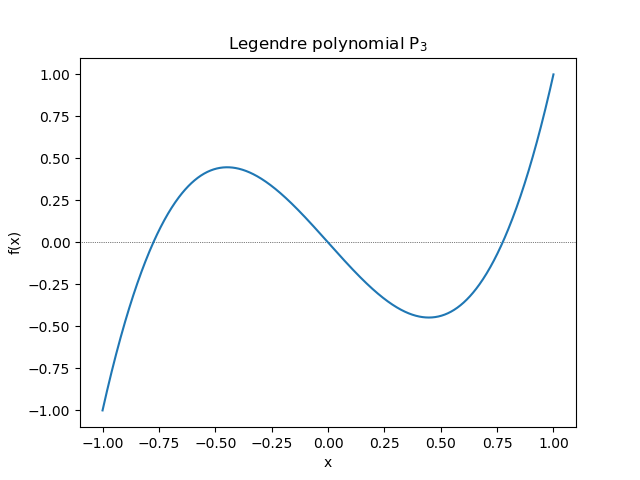

In [5]:
xpoints = np.linspace(-1,1,1000) # set of xpoints on which to calculate the function

plt.figure()
plt.axhline(c='k',ls=':',lw=0.5)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Legendre polynomial P$_3$")
plt.plot(xpoints, f(xpoints));

Let's set our $x_1$ and $x_2$ and iterate the secant method to see if we can find the root between 0.5 and 1.0. We'll do this by calculating the difference between the two $x$-points, and then looping until this becomes less than the tolerance we set above.

In [6]:
# guess of initial positions.
x1 = 0.5
x2 = 1

# Iterate the secant method:
while abs(x2-x1) > tolerance: # is the difference less than the tolerance yet?
    x3 = x2 - f(x2)*(x2-x1)/(f(x2)-f(x1))
    x1 = x2 # reset x1 and x2
    x2 = x3 #  for the next iteration
    print("...difference between x1,x2 is", abs(x2-x1), "\tCondition met?", abs(x2-x1) < tolerance) # True or False?

print("\n Convergence condition met, best estimate of root is at x = ", x3)
    


...difference between x1,x2 is 0.34782608695652173 	Condition met? False
...difference between x1,x2 is 0.0770993725245872 	Condition met? False
...difference between x1,x2 is 0.05968852944068159 	Condition met? False
...difference between x1,x2 is 0.01568660364567631 	Condition met? False
...difference between x1,x2 is 0.0012854075204892235 	Condition met? False
...difference between x1,x2 is 3.614279948771504e-05 	Condition met? True

 Convergence condition met, best estimate of root is at x =  0.7745967616830477


We can see this has converged quickly. As a check, let's see what the value of the function at this point is:

In [7]:
print("f(x) at x = ", x3, "is", f(x3))

f(x) at x =  0.7745967616830477 is 2.7732474272568197e-07


For even more accurate results, we could decrease the value of `tolerance`. Experiment with this, the function itself, and the initial guesses until you're happy you understand.

# Using this approach for boundary value problems

We've already seen several initial-value differential equation problems - like the low-pass filter in session 7 and the pendulum in session 7. Another class of differential equations are boundary value problems, which are slightly more complicated to code.

### Example: a thrown ball, revisited

Let's look at a simple example, which we've already seen in the script for session 7 - a ball being thrown vertically upwards into the air. We took the second-order differential equation for this:

$$ \frac{d^2 y}{dt^2} = -g$$

and rewrote it in the form of two simultaneous first-order equations:

$$ \frac{dy}{dt} = v_y = f(y), \\ \frac{d v_y}{dt} = -g = f(v_y),$$

which when solved will give us $y(t)$ and $v_y(t)$.

In session 7 we used initial-value conditions - we started with initial conditions $v_y = 20$ m/s and $y = 10$ m, and 
solved for a time period of 5 seconds.

Now we're going to solve the same problem with boundary value conditions instead. We're going to specify that the ball has height $x = 0$ m at $t = 0$ s, and require that $x = 0$ m again at a later time $t = t_1 = 10 $s. We then need to calculate what initial velocity will meet these conditions.

Exactly as before, we can set up the initial parameters:

In [8]:
g = 9.81              # gravitational acceleration in m/s^2

tstart = 0.0          # start time,
tend = 10.0           # end time, in seconds.
N = 1000              # number of points for Runge-Kutta
h = (tend - tstart)/N # size of Runge-Kutta steps

tpoints = np.arange(tstart, tend, h)

Now we'll use exactly the same function as in session 7 to define the RHS of the equation:

In [10]:
def f(r,t): 
    '''Definition of the vector function to be solved
    for particle subject to gravitational acceleration.
    Inputs are r (a vector of y-position and y-velocity) and t'''
    y = r[0]  # first element of r represents the y-position of the particle
    vy = r[1] # second element of r represents the y-velocity of the particle
    fy = vy   # dy/dt is velocity
    fvy = -g  # dvy/dt = -g
    return np.array([fy,fvy]) # convert fy and fvy to an array form

However we'll make some small changes to the Runge-Kutta function. The final point in our `tpoints` array is actually at `tend-h`, and so to calculate the value at $t = t_{\rm end}$ (which is what we need for a boundary value problem!), we need to include an extra element in the output arrays. We'll do this by including extra `append` statements after the loop has ended:

In [11]:
def RungeKutta2d(r,tpoints):
    '''Fourth-order Runge-Kutta rewritten for two simultaneous equations
    Inputs: r: 2-component array , first component is x, second y
            tpoints: array of time values.
    Outputs: [xpoints, ypoints]: solutions for x(t) and y(t), numpy arrays one longer than tpoints'''
    xpoints = [] # initialise empty arrays
    ypoints = []
    for t in tpoints: # loops over all tpoints up to (tend-h)
        xpoints.append(r[0])
        ypoints.append(r[1])
        # The following is the same as the 1d version, with x->r
        k1 = h*f(r,t) 
        k2 = h*f(r+0.5*k1, t+0.5*h)
        k3 = h*f(r+0.5*k2, t+0.5*h)
        k4 = h*f(r+k3, t+h)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    # these next two lines calculate for the point at t = tend!
    xpoints.append(r[0])
    ypoints.append(r[1])
    return np.array([xpoints, ypoints]) # convert output to numpy array with 2 rows and N+1 columns

Note that the output arrays therefore have `N+1` elements in them, while `tpoints` has `N` elements.

We want to find the value of the initial velocity $v_y$ that returns the ball to the ground at $y = 0$ exactly 10 seconds later. To do this, we'll use the secant method from above. 

The procedure we'll use is:

* Guess two possible initial velocities, 
* Then calculate the time at which they will land. Are either of them equal to 10 seconds (to within the limit set by the tolerance)? 
* If not, use the secant method to converge on the initial velocity that does correspond to a 10 second flight.
  
The code cell below does this. Note how for the first guess I've coded everything step-by-step, but subsequently I've combined all this into a single line of code. Either way will work, but the second is slightly more compact.

In [12]:
# Define the initial conditions
vy1 = 0                        # guess 1 of initial y-velocity (m/s)
vy2 = 200                      # guess 2 of initial y-velocity (m/s)

# Solve for the first guess
# Here we set the initial conditions in a separate array r
r = np.array([0, vy1])          # initial y is 0, initial vy is our first guess
soln1 = RungeKutta2d(r,tpoints) # the whole array of solutions
# We are interested only in the final height, i.e. final element of first row
height1 = soln1[0,N]            # final element is at index N (counting from zero)

# solve for the second guess
# This time we'll insert the arrays directly into the Runge-Kutta function
# This is a bit more convenient, but needs more care to avoid mistakes!
# Either way works though
height2 = RungeKutta2d(np.array([0, vy2]),tpoints)[0,N]

### now for the secant method to converge on the right answer:

tolerance = 1e-4                # set the tolerance for convergence
while abs(vy2-vy1) > tolerance: # ...is diff between the two velocities less than the tolerance yet? 
    vy3 = vy2 - height2*(vy2-vy1)/(height2-height1)  
    # update initial velocities for the next iteration
    vy1 = vy2 
    vy2 = vy3 
    # and recalculate heights
    height1 = RungeKutta2d(np.array([0, vy1]),tpoints)[0,N]
    height2 = RungeKutta2d(np.array([0, vy2]),tpoints)[0,N]
    
print("The ball needs to be launched with an initial velocity of", vy3, "m/s")
    
    

The ball needs to be launched with an initial velocity of 49.050000000000225 m/s


We can see that this has found a solution with no problems! 

Is this the right solution? Fortunately we have a very simple form of the analytical solution, so we can easily check.

In [13]:
tof = 2*vy3/g # calculated time of flight

print("Time of flight with this initial velocity is", tof, "seconds")

Time of flight with this initial velocity is 10.000000000000044 seconds


Great. Finally, we'll plot this solution. Note, however, that we have a minor complication here, as our output array for the y-position has N+1 elements, whereas `tpoints` only has N elements. We need two arrays of equal length to plot, so we'll need to create a *new* array of time points for the plot. This array will need to start at `tstart`, finishes at `tend` (but not before!) and has points separated by `h`:

<IPython.core.display.Javascript object>


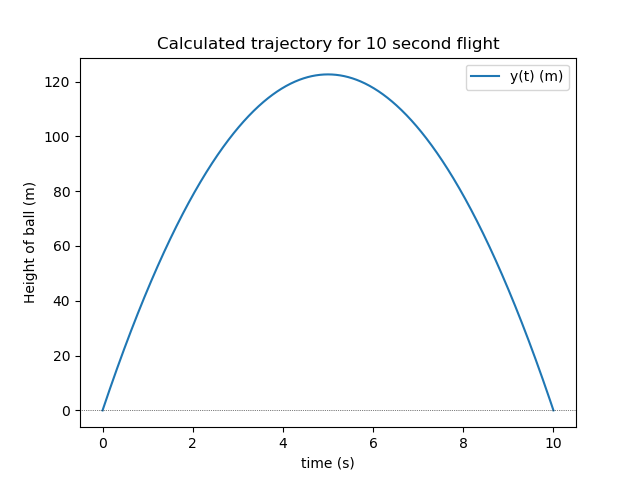

In [14]:
tplotpoints = np.arange(tstart, tend+h, h) # array with same properties as tpoints but includes end point

bestsoln = RungeKutta2d([0, vy3],tpoints)  # call this with the *calculation* tpoints array

# but *plot* it with the new tplotpoints array.
plt.figure()
plt.plot(tplotpoints,bestsoln[0],label="y(t) (m)")
plt.legend()
plt.axhline(c="k",ls=":", lw=0.5)          # draw black dotted line at y = 0
plt.xlabel("time (s)")
plt.ylabel("Height of ball (m)")
plt.title("Calculated trajectory for 10 second flight");

This initial velocity returns the ball to the ground 10 seconds after launch, as required.

We can use this approach of combining Runge-Kutta with a root-finding method to solve many boundary-value problems, including the one you will tackle in the final assignment.

## What to do now
Experiment with the code in this notebook, for example by finding roots of other functions, and varying the parameters for the gravity example. Make sure you understand all the basic principles and procedures in this notebook before attempting the final assignment!